In [21]:
import numpy as np 
import numpy.linalg as LA 
import matplotlib.pyplot as plt

In [153]:
class PCA():
    def __init__(self, data):
        self.data = data
        self.mean = np.mean(self.data)
        self.centered = data - self.mean
        self.var = np.var(self.centered)
        self.cov = np.cov(self.centered)
        
        e_val, e_vec = LA.eig(self.cov)

        order = np.argsort(-1*e_val)
        self.e_val_sorted = e_val[order]
        self.e_vec_sorted = e_vec[:,order]
    
    def project(self, eigen_vec_order):
        e_vec = self.e_vec_sorted[:,eigen_vec_order]
        return e_vec.T@self.centered, e_vec

    def transform(self, keep_m = 2):   
        col = np.arange(0 ,keep_m, 1)
        pca_ed, e_vec  =  self.project(col)
        
        recovered = pca_ed.T @ e_vec.T + self.mean
        error = np.mean(np.square(self.data - recovered.T))
        return pca_ed, error

    def plot_scree(self):
        num_e_val = self.e_val_sorted.shape[0]
        x = np.arange(0, num_e_val, 1)
        x_str = [str(a+1) for a in x]
        
        plt.figure(figsize=(num_e_val, 4))
        plt.bar(x, height=self.e_val_sorted, tick_label=x_str)
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Eigen Value')
        plt.show()





In [154]:
data = np.loadtxt('expDat.txt', skiprows=1, delimiter=',', usecols=np.arange(1,21)).T
data.shape

(20, 100)

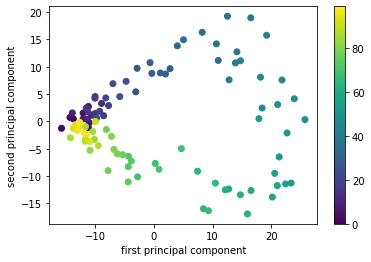

In [174]:
pca1 = PCA(data)
first_prj, _ = pca1.project(0)
sec_prj, _ = pca1.project(1)
t = np.arange(0, data.shape[1], 1)
plt.scatter(x=first_prj, y=sec_prj, c=t)
plt.colorbar()
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

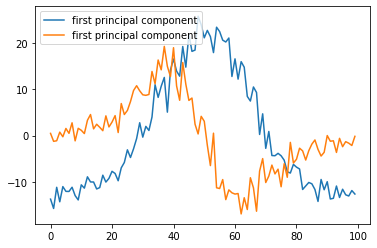

In [184]:

plt.plot(t, first_prj, label='first principal component')
plt.plot(t, sec_prj, label='first principal component')
plt.legend()
plt.show()

